# Redes Neuronales

In [ ]:
import numpy as np

from sklearn import neural_network
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from mlutils import load_dataset
import matplotlib.pyplot as plt

%matplotlib inline

## Repaso de algunas funciones de activación

### ReLU

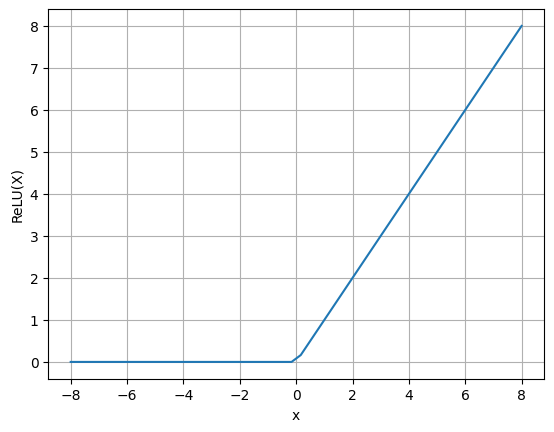

In [3]:
eje_x = np.linspace(-8,8)

def ReLU(x):
    return np.array([xi if xi >= 0 else 0 for xi in x])

plt.plot(eje_x, ReLU(eje_x))
plt.grid()
plt.xlabel('x')
plt.ylabel('ReLU(X)')
plt.show()

### Sigmoide

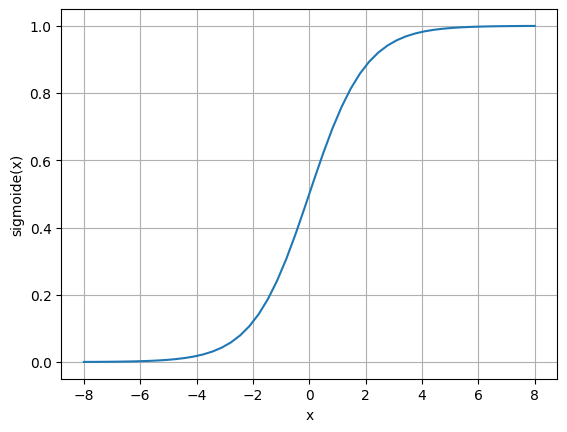

In [4]:
def sigmoide(x):
    return 1.0 / (1 + np.exp(-x))

plt.plot(eje_x, sigmoide(eje_x))
plt.grid()
plt.xlabel('x')
plt.ylabel('sigmoide(x)')
plt.show()

### Tangente hiperbólica

Text(0, 0.5, 'tanh(x)')

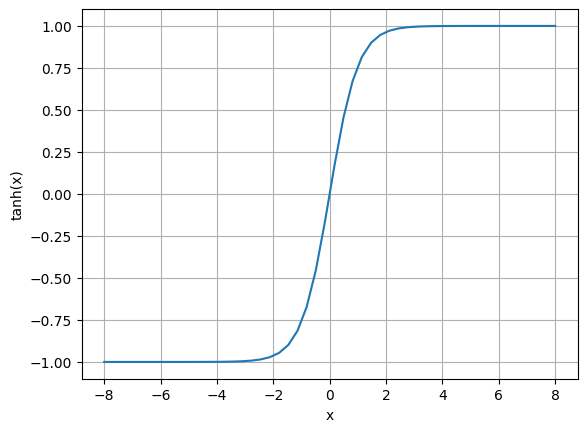

In [5]:
plt.plot(eje_x, np.tanh(eje_x))
plt.grid()
plt.xlabel('x')
plt.ylabel('tanh(x)')

## El problema: Determinar si una imagen tiene o no tiene un gato, dado un conjunto de datos con etiquetas.

<table>
  <tr>
    <th>Cat</th>
    <td> <img src="images/cat1.jpg" width="150"></td>
    <td> <img src="images/cat2.png" width="150"></td>
   </tr> 
   <tr>
      <th>Non Cat</th>
      <td> <img src="images/no_cat1.jpeg" width="150"></td>
      <td> <img src="images/no_cat2.jpg" width="150"></td>
  </tr>
</table>


In [6]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

## Normalización

útil para que no haya valores muy grandes de gradiente

In [7]:
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_test = X_test_orig.reshape(X_test_orig.shape[0], -1)
X_train = X_train/255.
X_test = X_test/255.

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

Observams algún caso

y = [1], it's a 'cat' picture.


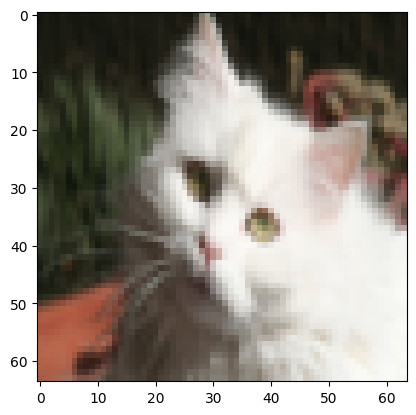

In [11]:
index = 102
# print (X_train[index].reshape(()))
plt.imshow(X_train_orig[index])
print ("y = " + str(Y_train[index]) + ", it's a '" + classes[np.squeeze(Y_train[index])].decode("utf-8") +  "' picture.")

## Implementación en Sklearn

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.predict_proba)

In [12]:
clf = neural_network.MLPClassifier(
    solver='sgd',
    alpha=1e-4, 
    hidden_layer_sizes=(5),
    learning_rate='constant',
    learning_rate_init=0.001,
    batch_size=20,
    random_state=1,
    max_iter=1000,
    verbose=True)

In [13]:
clf.fit(X_train, Y_train.ravel())

Iteration 1, loss = 0.73637257
Iteration 2, loss = 0.72814070
Iteration 3, loss = 0.72206618
Iteration 4, loss = 0.71784621
Iteration 5, loss = 0.71409639
Iteration 6, loss = 0.70989772
Iteration 7, loss = 0.70659742
Iteration 8, loss = 0.70302878
Iteration 9, loss = 0.69942054
Iteration 10, loss = 0.69628679
Iteration 11, loss = 0.69333155
Iteration 12, loss = 0.69071555
Iteration 13, loss = 0.68790359
Iteration 14, loss = 0.68550357
Iteration 15, loss = 0.68305682
Iteration 16, loss = 0.68085484
Iteration 17, loss = 0.67877683
Iteration 18, loss = 0.67667372
Iteration 19, loss = 0.67460631
Iteration 20, loss = 0.67271247
Iteration 21, loss = 0.67108388
Iteration 22, loss = 0.66907659
Iteration 23, loss = 0.66728475
Iteration 24, loss = 0.66605890
Iteration 25, loss = 0.66441623
Iteration 26, loss = 0.66304044
Iteration 27, loss = 0.66154193
Iteration 28, loss = 0.66013801
Iteration 29, loss = 0.65879022
Iteration 30, loss = 0.65764886
Iteration 31, loss = 0.65623976
Iteration 32, los

Iteration 253, loss = 0.21138664
Iteration 254, loss = 0.20968574
Iteration 255, loss = 0.21643316
Iteration 256, loss = 0.21307742
Iteration 257, loss = 0.20955234
Iteration 258, loss = 0.20845110
Iteration 259, loss = 0.20834004
Iteration 260, loss = 0.20793360
Iteration 261, loss = 0.20784729
Iteration 262, loss = 0.20853156
Iteration 263, loss = 0.20737847
Iteration 264, loss = 0.20820052
Iteration 265, loss = 0.20762901
Iteration 266, loss = 0.20682159
Iteration 267, loss = 0.20611336
Iteration 268, loss = 0.20697526
Iteration 269, loss = 0.20612244
Iteration 270, loss = 0.20705427
Iteration 271, loss = 0.20698021
Iteration 272, loss = 0.20534009
Iteration 273, loss = 0.20463309
Iteration 274, loss = 0.20511210
Iteration 275, loss = 0.20508077
Iteration 276, loss = 0.20491087
Iteration 277, loss = 0.20467332
Iteration 278, loss = 0.20459954
Iteration 279, loss = 0.20407434
Iteration 280, loss = 0.20368207
Iteration 281, loss = 0.20551559
Iteration 282, loss = 0.20291512
Iteration 

MLPClassifier(batch_size=20, hidden_layer_sizes=5, max_iter=1000,
              random_state=1, solver='sgd', verbose=True)

In [14]:
neural_network.MLPClassifier?

Calculemos cuántos parámetros tiene el modelo:

In [15]:
total_params = 0
for case, name in zip(clf.coefs_, ('wi','bias')):
    print(name, '=', np.size(case))
    total_params += np.size(case)

for case, name in zip(clf.intercepts_, ('wi','bias')):
    print(name, '=', np.size(case))
    total_params += np.size(case)

print('total params = ', total_params)

wi = 61440
bias = 5
wi = 5
bias = 1
total params =  61451


Veamos algunas predicciones de probabilidad:

In [16]:
np.round(np.exp(clf.predict_log_proba(X_train)),1)

array([[0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9,

Podemos calcular la Accuracy del modelo en el conjunto de datos de entrenamiento:

In [17]:
predictions = clf.predict(X_train)
print (f'Accuracy: {accuracy_score(Y_train, predictions)*100:.2f}')

Accuracy: 94.74


Y ver cuánto da en el conjunto de datos de prueba

In [18]:
predictions = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(Y_test, predictions)*100:.2f}')

print('i, match, case (1=cat, 0=nocat)')
for i, match in enumerate(predictions == Y_test.ravel()):
    if i<15:
        print(i,match, Y_test[i])


Accuracy: 68.00
i, match, case (1=cat, 0=nocat)
0 True [1]
1 True [1]
2 True [1]
3 True [1]
4 True [1]
5 False [0]
6 True [1]
7 True [1]
8 True [1]
9 True [1]
10 False [1]
11 True [1]
12 True [1]
13 False [0]
14 True [0]


Veamos algunas predicciones:

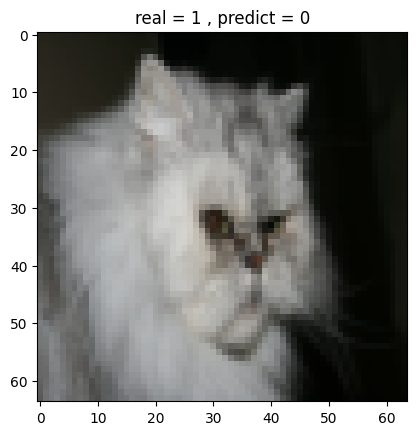

In [23]:
idx = 10
num_px = X_train_orig.shape[1]
plt.imshow(X_test[idx].reshape((num_px, num_px, 3)))
plt.title('real = '+str(Y_test[idx].item())+f' , predict = {predictions[idx]}')
plt.show()


Podemos ver cuál es la función de activación de salida

In [24]:
clf.out_activation_

'logistic'

# Keras

[Documentación](https://keras.io/api/models/model_training_apis/)

Implementemos el mismo clasificador pero construyendo el perceptrón múltiple con Keras

In [25]:
#import theano
#theano.config.optimizer = 'None'
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.regularizers import L2
from keras.utils import set_random_seed

set_random_seed(2)

2024-06-29 12:46:37.921598: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-29 12:46:37.929740: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-29 12:46:38.062604: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-29 12:46:38.578888: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-29 12:46:40.018392: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

[Dense layer](https://keras.io/api/layers/core_layers/dense/):

$y = activation(kernel \cdot X+bias)$


Definimos el modelo

In [26]:
model = Sequential([
    Dense(5, input_shape=(X_train.shape[1],), activation="relu", kernel_regularizer=L2(1e-4)),
    Dense(1, activation="sigmoid", kernel_regularizer=L2(1e-4))
])

/home/diego/Nobu/Trabajos/DiploDatos/tensorflow_venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Definimos qué optimizador vamos a utilizar, qué función de costo vamos a optimizar y qué métricas almacenar:

In [27]:
opt = SGD(learning_rate=0.001)
model.compile(
    optimizer=opt,
    loss="binary_crossentropy",
    metrics=["acc"]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │        61,445 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,451 (240.04 KB)

 Trainable params: 61,451 (240.04 KB)

 Non-trainable params: 0 (0.00 B)

Ajustamos el modelo:

In [28]:
model.fit(X_train, Y_train.ravel(), batch_size=20, epochs=500, validation_data=(X_test, Y_test))#, workers=2)

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.5816 - loss: 0.7118 - val_acc: 0.3400 - val_loss: 1.1373
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6474 - loss: 0.6665 - val_acc: 0.3400 - val_loss: 1.1245
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6474 - loss: 0.6545 - val_acc: 0.3400 - val_loss: 1.1124
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6509 - loss: 0.6443 - val_acc: 0.3400 - val_loss: 1.1009
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6468 - loss: 0.6353 - val_acc: 0.3400 - val_loss: 1.0864
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6539 - loss: 0.6277 - val_acc: 0.3400 - val_loss: 1.1358
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6551 - loss: 0.6251 - val_acc: 0.3400 - val_loss: 1.1436
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6586 - loss: 0.6194 - val_acc: 0.3400 - val_loss: 1.1147
Epoch 9/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.671

Epoch 55/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8054 - loss: 0.4218 - val_acc: 0.4200 - val_loss: 0.9163
Epoch 56/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8054 - loss: 0.4188 - val_acc: 0.4200 - val_loss: 0.9027
Epoch 57/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8314 - loss: 0.4158 - val_acc: 0.4200 - val_loss: 0.9097
Epoch 58/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8302 - loss: 0.4136 - val_acc: 0.4200 - val_loss: 0.9067
Epoch 59/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8302 - loss: 0.4108 - val_acc: 0.4200 - val_loss: 0.9135
Epoch 60/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8314 - loss: 0.4088 - val_acc: 0.4800 - val_loss: 0.8814
Epoch 61/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8314 - loss: 0.4053 - val_acc: 0.4400 - val_loss: 0.8984
Epoch 62/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8331 - loss: 0.4034 - val_acc: 0.4600 - val_loss: 0.8894
Epoch 63/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - ac

Epoch 109/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9101 - loss: 0.3093 - val_acc: 0.5800 - val_loss: 0.8014
Epoch 110/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9117 - loss: 0.3077 - val_acc: 0.5800 - val_loss: 0.7847
Epoch 111/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9117 - loss: 0.3062 - val_acc: 0.5800 - val_loss: 0.7850
Epoch 112/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9117 - loss: 0.3045 - val_acc: 0.5800 - val_loss: 0.7904
Epoch 113/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9117 - loss: 0.3028 - val_acc: 0.5800 - val_loss: 0.7936
Epoch 114/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9117 - loss: 0.3014 - val_acc: 0.5800 - val_loss: 0.7924
Epoch 115/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9117 - loss: 0.2999 - val_acc: 0.5800 - val_loss: 0.7810
Epoch 116/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9117 - loss: 0.2985 - val_acc: 0.5800 - val_loss: 0.7886
Epoch 117/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9471 - loss: 0.2394 - val_acc: 0.6400 - val_loss: 0.7420
Epoch 163/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9471 - loss: 0.2379 - val_acc: 0.6400 - val_loss: 0.7358
Epoch 164/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9471 - loss: 0.2372 - val_acc: 0.6400 - val_loss: 0.7379
Epoch 165/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9471 - loss: 0.2357 - val_acc: 0.6400 - val_loss: 0.7373
Epoch 166/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9514 - loss: 0.2348 - val_acc: 0.6400 - val_loss: 0.7498
Epoch 167/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9514 - loss: 0.2333 - val_acc: 0.6400 - val_loss: 0.7437
Epoch 168/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9514 - loss: 0.2325 - val_acc: 0.6400 - val_loss: 0.7357
Epoch 169/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9514 - loss: 0.2316 - val_acc: 0.6400 - val_loss: 0.7352
Epoch 170/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9765 - loss: 0.1890 - val_acc: 0.6800 - val_loss: 0.7073
Epoch 216/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9765 - loss: 0.1883 - val_acc: 0.6600 - val_loss: 0.7212
Epoch 217/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9765 - loss: 0.1871 - val_acc: 0.6800 - val_loss: 0.7156
Epoch 218/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9765 - loss: 0.1864 - val_acc: 0.6800 - val_loss: 0.7147
Epoch 219/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9765 - loss: 0.1857 - val_acc: 0.7000 - val_loss: 0.7043
Epoch 220/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9765 - loss: 0.1853 - val_acc: 0.7000 - val_loss: 0.7082
Epoch 221/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9765 - loss: 0.1843 - val_acc: 0.6800 - val_loss: 0.7170
Epoch 222/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9765 - loss: 0.1832 - val_acc: 0.6800 - val_loss: 0.7168
Epoch 223/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9846 - loss: 0.1523 - val_acc: 0.7000 - val_loss: 0.7054
Epoch 269/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9846 - loss: 0.1516 - val_acc: 0.7000 - val_loss: 0.7054
Epoch 270/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9846 - loss: 0.1510 - val_acc: 0.7000 - val_loss: 0.7040
Epoch 271/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9846 - loss: 0.1506 - val_acc: 0.7000 - val_loss: 0.7018
Epoch 272/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9846 - loss: 0.1500 - val_acc: 0.7000 - val_loss: 0.7083
Epoch 273/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9846 - loss: 0.1492 - val_acc: 0.7000 - val_loss: 0.7044
Epoch 274/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9846 - loss: 0.1488 - val_acc: 0.7000 - val_loss: 0.7051
Epoch 275/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9846 - loss: 0.1481 - val_acc: 0.7000 - val_loss: 0.7048
Epoch 276/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9935 - loss: 0.1249 - val_acc: 0.6800 - val_loss: 0.7065
Epoch 322/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9935 - loss: 0.1246 - val_acc: 0.7000 - val_loss: 0.7115
Epoch 323/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9935 - loss: 0.1239 - val_acc: 0.7000 - val_loss: 0.7118
Epoch 324/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9935 - loss: 0.1234 - val_acc: 0.7000 - val_loss: 0.7081
Epoch 325/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9978 - loss: 0.1232 - val_acc: 0.7000 - val_loss: 0.7104
Epoch 326/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9978 - loss: 0.1226 - val_acc: 0.7000 - val_loss: 0.7095
Epoch 327/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9978 - loss: 0.1222 - val_acc: 0.7000 - val_loss: 0.7132
Epoch 328/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9978 - loss: 0.1216 - val_acc: 0.7000 - val_loss: 0.7122
Epoch 329/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9978 - loss: 0.1040 - val_acc: 0.6800 - val_loss: 0.7236
Epoch 375/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9978 - loss: 0.1036 - val_acc: 0.6800 - val_loss: 0.7203
Epoch 376/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9978 - loss: 0.1034 - val_acc: 0.6800 - val_loss: 0.7244
Epoch 377/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9978 - loss: 0.1029 - val_acc: 0.6800 - val_loss: 0.7234
Epoch 378/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9978 - loss: 0.1026 - val_acc: 0.6800 - val_loss: 0.7224
Epoch 379/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9978 - loss: 0.1023 - val_acc: 0.6800 - val_loss: 0.7234
Epoch 380/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9978 - loss: 0.1019 - val_acc: 0.6800 - val_loss: 0.7260
Epoch 381/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9978 - loss: 0.1016 - val_acc: 0.6800 - val_loss: 0.7245
Epoch 382/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9978 - loss: 0.0879 - val_acc: 0.7000 - val_loss: 0.7396
Epoch 428/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9978 - loss: 0.0876 - val_acc: 0.7000 - val_loss: 0.7386
Epoch 429/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9978 - loss: 0.0874 - val_acc: 0.7000 - val_loss: 0.7386
Epoch 430/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 1.0000 - loss: 0.0872 - val_acc: 0.7000 - val_loss: 0.7418
Epoch 431/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9978 - loss: 0.0868 - val_acc: 0.7000 - val_loss: 0.7405
Epoch 432/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9978 - loss: 0.0866 - val_acc: 0.7000 - val_loss: 0.7404
Epoch 433/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 1.0000 - loss: 0.0863 - val_acc: 0.7000 - val_loss: 0.7426
Epoch 434/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 1.0000 - loss: 0.0860 - val_acc: 0.7000 - val_loss: 0.7409
Epoch 435/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 1.

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 1.0000 - loss: 0.0754 - val_acc: 0.7400 - val_loss: 0.7592
Epoch 481/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 1.0000 - loss: 0.0751 - val_acc: 0.7400 - val_loss: 0.7576
Epoch 482/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 1.0000 - loss: 0.0750 - val_acc: 0.7400 - val_loss: 0.7582
Epoch 483/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 1.0000 - loss: 0.0747 - val_acc: 0.7200 - val_loss: 0.7609
Epoch 484/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 0.0745 - val_acc: 0.7400 - val_loss: 0.7579
Epoch 485/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 1.0000 - loss: 0.0744 - val_acc: 0.7400 - val_loss: 0.7592
Epoch 486/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 0.0742 - val_acc: 0.7400 - val_loss: 0.7602
Epoch 487/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 1.0000 - loss: 0.0739 - val_acc: 0.7400 - val_loss: 0.7596
Epoch 488/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.

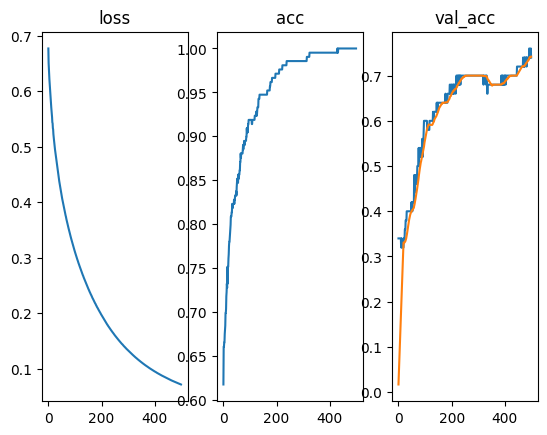

In [29]:
plt.subplot(1,3,1)
plt.plot(model.history.history['loss'])
plt.title('loss')
plt.subplot(1,3,2)
plt.plot(model.history.history['acc'])
plt.title('acc')
plt.subplot(1,3,3)
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret/n
plt.plot(model.history.history['val_acc'])
plt.plot(moving_average(model.history.history['val_acc'],n=20))
plt.title('val_acc')
plt.show()

Podemos acceder a los pesos y almacenarlos si es que nos interesa guardar el modelo:

In [30]:
wnew = model.weights
wnew

[<KerasVariable shape=(12288, 5), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(5,), dtype=float32, path=sequential/dense/bias>,
 <KerasVariable shape=(5, 1), dtype=float32, path=sequential/dense_1/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential/dense_1/bias>]

Existe el método evaluate para evaluar el modelo en el conjunto de datos de prueba:

In [31]:
model.evaluate(x=X_test, y=Y_test, batch_size=100,)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.7400 - loss: 0.7662


[0.7662143707275391, 0.7400000095367432]

El método predict permite predecir utilizando el modelo entrenado

##### prediction = model.predict(x=X_test)
prediction[prediction>0.5] = 1
prediction[prediction<=0.5] = 0
prediction = prediction.squeeze()

index = 5
num_px = X_train_orig[index].shape[0]

plt.imshow(X_test[index,:].reshape((num_px, num_px, 3)))
print ("y = " + str(Y_test[index,0]) + ", you predicted that it is a \"" + classes[int(prediction[index])].decode("utf-8") +  "\" picture.")

y = 1, you predicted that it is a "cat" picture.


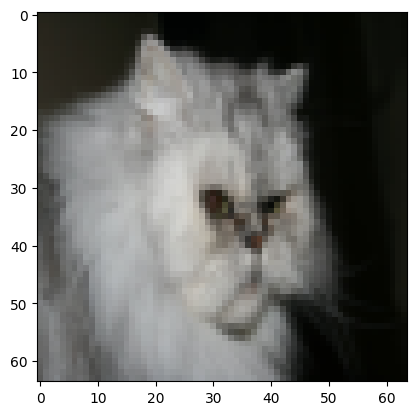

In [34]:
##### prediction = model.predict(x=X_test)
prediction[prediction>0.5] = 1
prediction[prediction<=0.5] = 0
prediction = prediction.squeeze()

index = 10
num_px = X_train_orig[index].shape[0]

plt.imshow(X_test[index,:].reshape((num_px, num_px, 3)))
print ("y = " + str(Y_test[index,0]) + ", you predicted that it is a \"" + classes[int(prediction[index])].decode("utf-8") +  "\" picture.")

Veamos algunas métricas de bondad de modelo:

              precision    recall  f1-score   support

           0       0.60      0.71      0.65        17
           1       0.83      0.76      0.79        33

    accuracy                           0.74        50
   macro avg       0.72      0.73      0.72        50
weighted avg       0.75      0.74      0.74        50



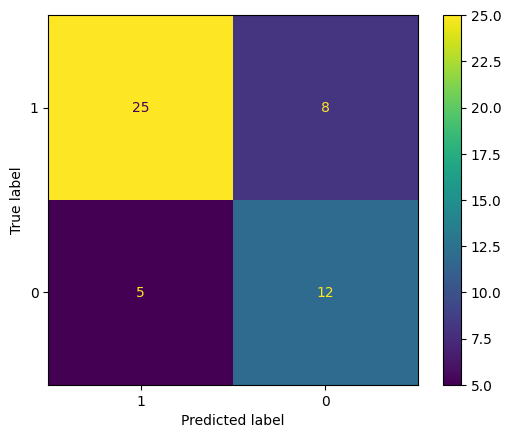

In [35]:
print(classification_report(Y_test, prediction))
ConfusionMatrixDisplay.from_predictions(Y_test, prediction,labels=(1,0))

# Representación gráfica de la red

In [ ]:
#import visualkeras #hay que instalarlo
#visualkeras.layered_view(model).show()#, legend=True)

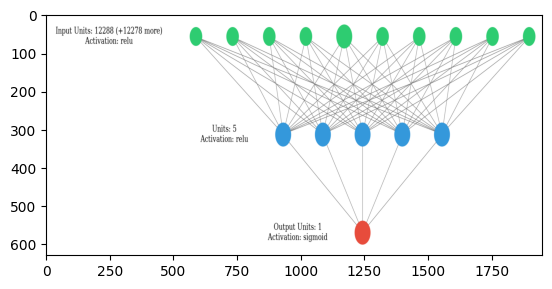

In [36]:
from keras_visualizer import visualizer #hay que instalarlo
visualizer(model, file_name='images/keras_visualizer', file_format='png', view=False)
#visualizer(model, file_name='graph', file_format=None, view=True, settings=None)
plt.imshow(plt.imread('images/keras_visualizer.png'), aspect=1.5)

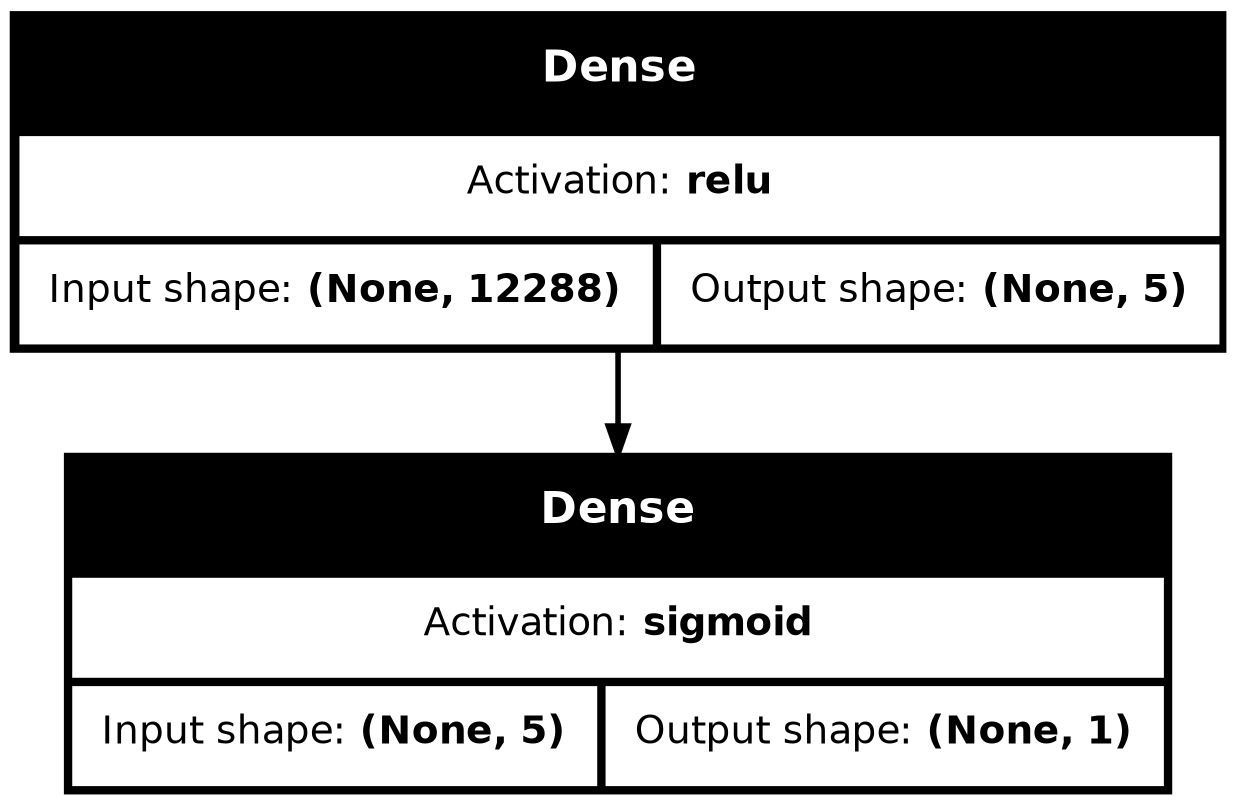

In [37]:
#!pip install pydot
from keras.utils import plot_model

plot_model(model, 
to_file='images/model.png',
show_shapes=True,
show_layer_names=False,
show_layer_activations=True)

# Ejemplo de uso más interesante

Ahora vamos a centrarnos en entrenar un perceptrón multicapa en un conjunto de datos más grande, como lo es el conjunto mnist de dígitos escritos a mano

In [38]:
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam
from keras.datasets import mnist

In [39]:
# cargamos el conjunto de datos
(x_train, y_train),(x_test, y_test) = mnist.load_data()
unique, counts = np.unique(y_train, return_counts=True)
print("Etiquetas de entrenamiento: ", dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print("Etiquetas de prueba: ", dict(zip(unique, counts)))


Etiquetas de entrenamiento:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Etiquetas de prueba:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


Muestreamos algunos dígitos:

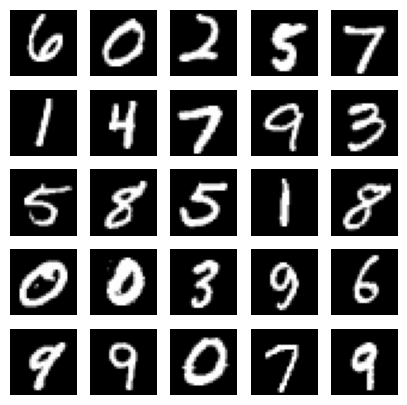

In [40]:
cantidad = 25
indexes = np.random.randint(0, x_train.shape[0], size=cantidad)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()

### One-Hot-Encoding

Primero transformamos las etiquetas (números del 0 al 9) a vectores de dimensión 10 en los cuáles sólo será no nulo el elemento cuyo índice de órden sea igual a la etiqueta. Esto es:

$0 = (1,0,0,0,0,0,0,0,0,0)$

$1 = (0,1,0,0,0,0,0,0,0,0)$

$2 = (0,0,1,0,0,0,0,0,0,0)$

$3 = (0,0,0,1,0,0,0,0,0,0)$

$4 = (0,0,0,0,1,0,0,0,0,0)$

$5 = (0,0,0,0,0,1,0,0,0,0)$

$6 = (0,0,0,0,0,0,1,0,0,0)$

$7 = (0,0,0,0,0,0,0,1,0,0)$

$8 = (0,0,0,0,0,0,0,0,1,0)$

$9 = (0,0,0,0,0,0,0,0,0,1)$


In [41]:
from keras.utils import to_categorical, plot_model

In [42]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [43]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [44]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [45]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### Preprocesamiento de los datos

- Suele ser conveniente normalizar los datos para evitar valores muy grandes de gradiente que puedan dificultar el proceso de aprendizaje. Los valores de los pixeles están en escala de grises de 0 a 255.

- El perceptrón múltiple debe aceptar un tensor 1-dimensional, así que hay que transformar los datos de entrada.

In [46]:
# Tamaño de la imagen, que se asume cuadrada
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [47]:
# transformación y normalización
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [48]:
x_train.shape

(60000, 784)

### Parámetros de la red

In [49]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

### Diseño de la arquitectura de la red

- Proponemos un diseño con 3 capas ocultas. 

- Las primeras dos capas serán idénticas y completamente conectadas. Tendrán funciones de activación ReLU y implementaremos Dropout.

- Se eligirán 256 neuronas por capa oculta. Este número podría testearse a prueba y error. Se suelen usar múltiplos de 2 como 128, 512, 1024. En un análisis previo se vio que 256 funciona mejor.

In [50]:
modelo_mnist = Sequential()
modelo_mnist.add(Dense(hidden_units, input_dim=input_size, kernel_regularizer=L2(0.001)))
modelo_mnist.add(Activation('relu'))
modelo_mnist.add(Dropout(dropout))
modelo_mnist.add(Dense(hidden_units, kernel_regularizer=L2(0.001)))
modelo_mnist.add(Activation('relu'))
modelo_mnist.add(Dropout(dropout))
modelo_mnist.add(Dense(num_labels))
modelo_mnist.add(Activation('softmax'))
modelo_mnist.summary()

/home/diego/Nobu/Trabajos/DiploDatos/tensorflow_venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Esto sale de:

- Entrada a primera capa: $784 \times 256 + 256 = 200960$
- primera a Segunda capa: $256 \times 256 + 256 = 65792$
- segunda capa a salida: $10 \times 256 + 10 = 2570$
- Total : $200960 + 65972 + 2570 = 269322$

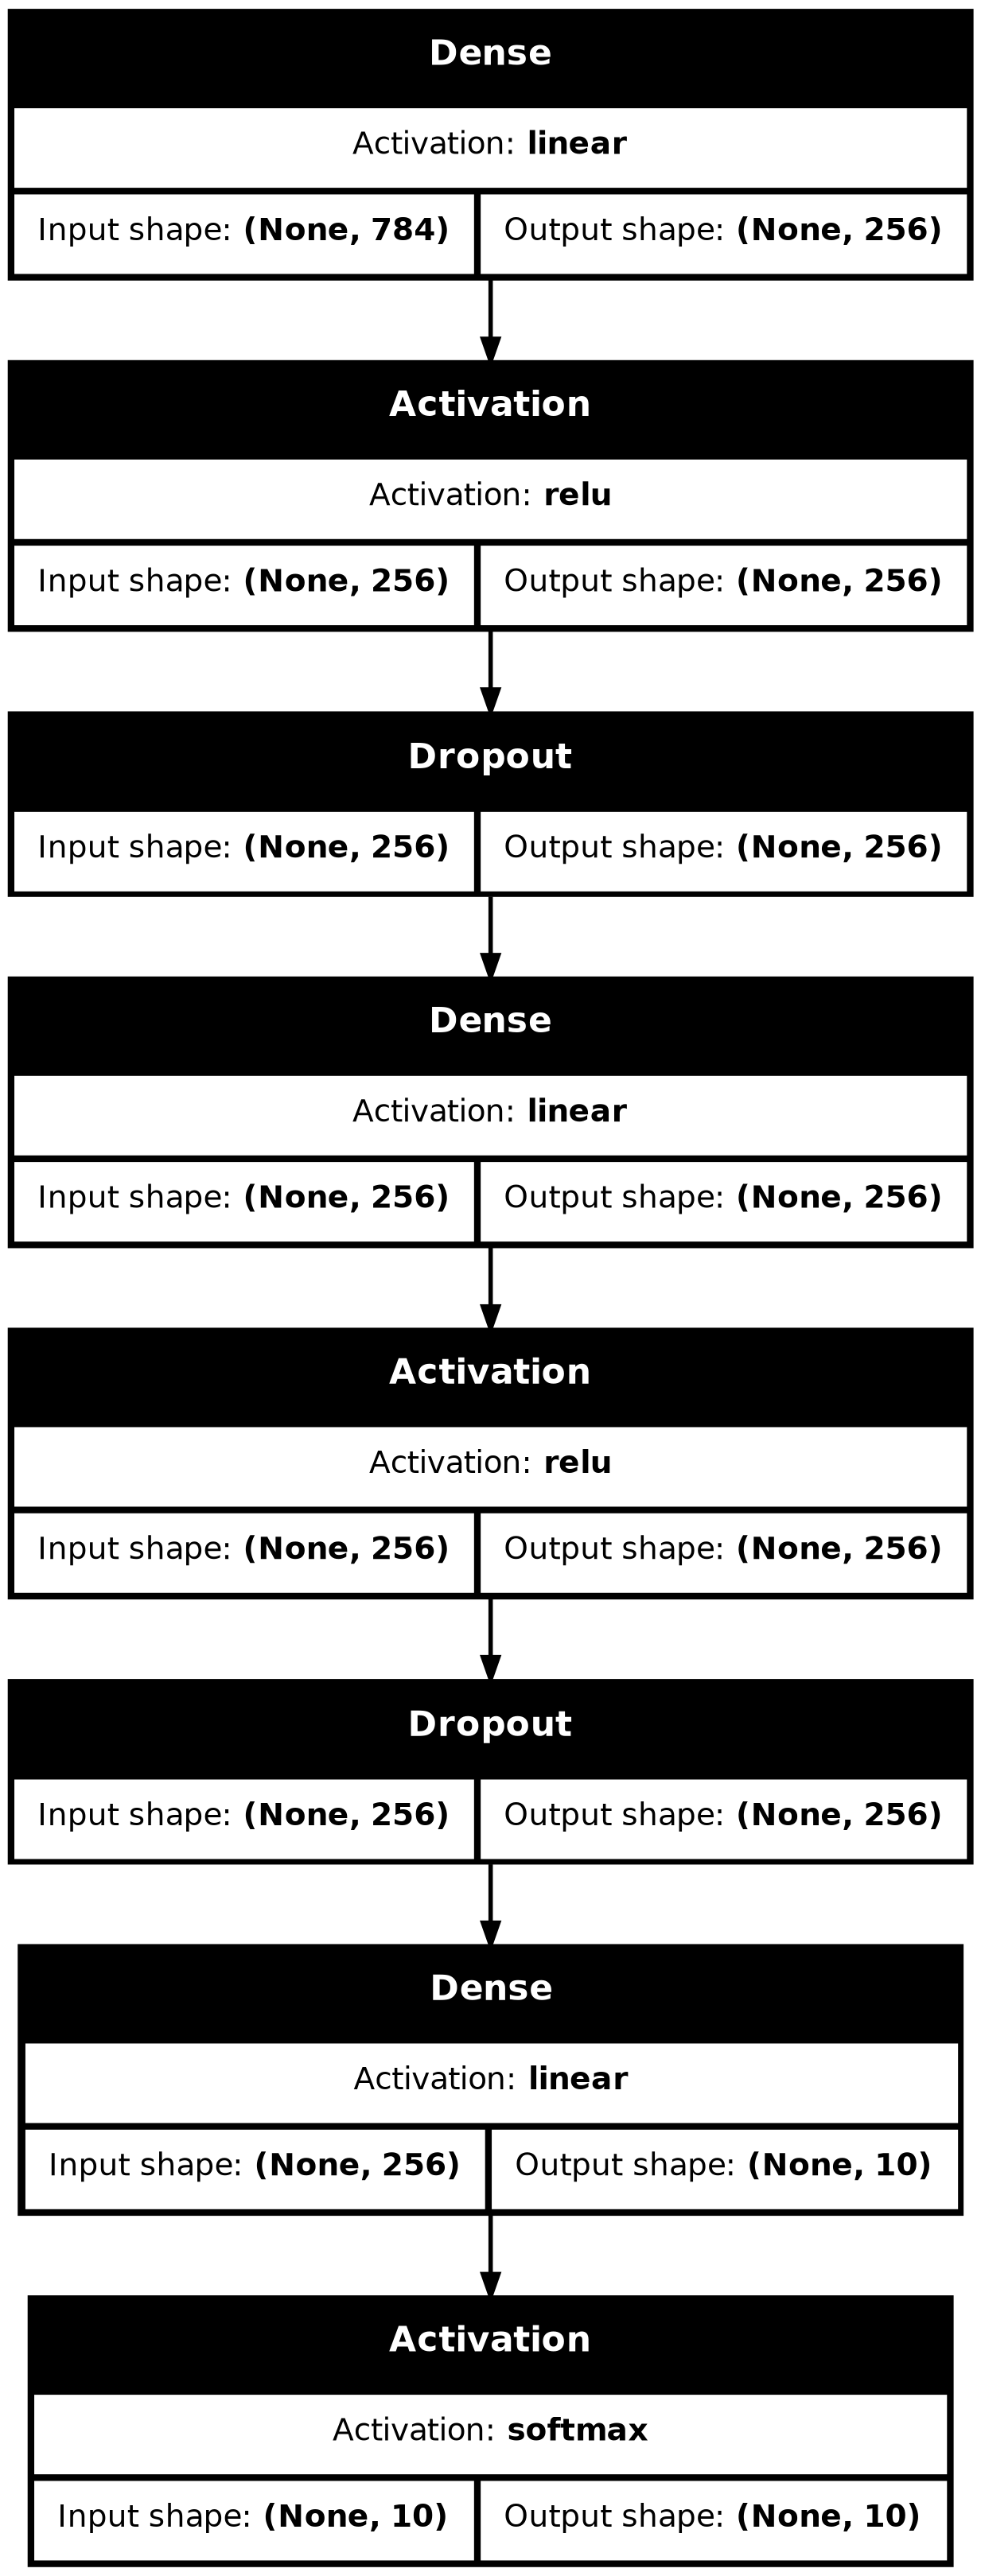

In [51]:
plot_model(modelo_mnist, 
to_file='images/modelo_mnist.png',
show_shapes=True,
show_layer_names=False,
show_layer_activations=True)

In [52]:
opt = Adam(learning_rate=0.001)
modelo_mnist.compile(loss='categorical_crossentropy', 
              optimizer=opt,
              metrics=["acc"])

In [53]:
modelo_mnist.fit(x_train, y_train, epochs=10,
 batch_size=batch_size,validation_data=(x_test, y_test))#, workers=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.7650 - loss: 1.1717 - val_acc: 0.9499 - val_loss: 0.4216
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9341 - loss: 0.4605 - val_acc: 0.9585 - val_loss: 0.3095
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9439 - loss: 0.3561 - val_acc: 0.9645 - val_loss: 0.2603
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.9485 - loss: 0.3138 - val_acc: 0.9666 - val_loss: 0.2436
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - acc: 0.9524 - loss: 0.2959 - val_acc: 0.9703 - val_loss: 0.2245
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.9537 - loss: 0.2833 - val_acc: 0.9674 - val_loss: 0.2286
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - acc: 0.9561 - loss: 0.2760 - val_acc: 0.9730 - val_loss: 0.2171
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.9571 - loss: 0.2724 - val_acc: 0.9731 - val_loss: 0.2114
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - ac

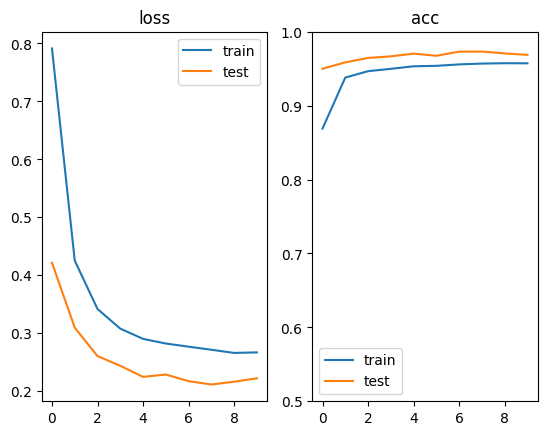

In [54]:
plt.subplot(1,2,1)
plt.plot(modelo_mnist.history.history['loss'], label='train')
plt.plot(modelo_mnist.history.history['val_loss'],label='test')
plt.legend()
plt.title('loss')
plt.subplot(1,2,2)
plt.plot(modelo_mnist.history.history['acc'],label='train')
plt.plot(modelo_mnist.history.history['val_acc'],label='test')
plt.ylim(0.5,1)
plt.title('acc')
plt.legend()
plt.show()

https://keras.io/getting_started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss

### Sanity check
Overfit a tiny subset of data. Before training on the full dataset try to train on a tiny portion (e.g. 20 examples) of your data and make sure you can achieve zero cost. For this experiment it’s also best to set regularization to zero, otherwise this can prevent you from getting zero cost. Unless you pass this sanity check with a small dataset it is not worth proceeding to the full dataset. Note that it may happen that you can overfit very small dataset but still have an incorrect implementation. For instance, if your datapoints’ features are random due to some bug, then it will be possible to overfit your small training set but you will never notice any generalization when you fold it your full dataset.

[referencia](https://cs231n.github.io/neural-networks-3/#sanitycheck)

Observamos que cada predicción es un array con 10 números, cuyo máximo valor corresponde a la clase predicha.

In [55]:
prediction = modelo_mnist.predict(x=x_test)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.38950088e-06, 1.04545043e-05, 1.99849528e-04, ...,
        9.99552310e-01, 1.34279378e-06, 6.12474905e-05],
       [1.10654146e-04, 2.22416781e-03, 9.96932268e-01, ...,
        2.98366595e-05, 1.07851440e-04, 7.68923840e-08],
       [5.58822694e-06, 9.98563826e-01, 2.53472943e-04, ...,
        1.79022973e-04, 3.31582851e-04, 1.82826443e-05],
       ...,
       [3.68346718e-07, 1.47810078e-05, 4.71767351e-07, ...,
        5.78717300e-06, 6.11832729e-06, 5.36631967e-04],
       [1.52916073e-05, 1.36826293e-06, 3.70466694e-07, ...,
        1.18318587e-06, 5.05440636e-04, 7.85149405e-06],
       [4.23567235e-06, 1.78194369e-07, 2.14121837e-06, ...,
        5.27229638e-09, 4.35813888e-07, 3.96984774e-08]], dtype=float32)

Podemos obtener la etiqueta predicha utilizando la función np.argmax

In [56]:
def get_label(x):
    return np.argmax(x)

get_label(prediction[0])

7

Acá tienen unas funciones que pueden servir para observar los resultados predichos:

In [57]:
def plot_image(i, predictions_array, true_label, img, num_px):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i].reshape((num_px, num_px, 1))
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  plt.title(f'True: {true_label}, Predicted: {predicted_label}')
  

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks(np.linspace(0,1,11).round(2))
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

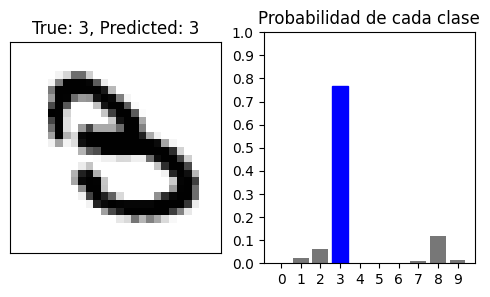

In [61]:
i = 18
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
num_px = 28
plot_image(i, prediction[i], y_test, x_test, num_px)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  y_test)
plt.title('Probabilidad de cada clase')
plt.show()

## Ejemplos extras

- El ejemplo de esta notebook fue basado en este [enlace](https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras/notebook).

- Va otro [ejemplo](https://www.tensorflow.org/tutorials/keras/classification?hl=es-419) de clasificación de imágenes de ropa. 

- Dejo un [ejemplo](https://www.tensorflow.org/tutorials/keras/regression?hl=es-419) de regresión con un perceptrón múltiple en keras para que no crean que es todo sobre imágenes.
